In [28]:
%matplotlib widget
import numpy as np
from pygdsm import GlobalSkyModel
from pygdsm import GSMObserver
from functools import partial
import healpy as hp
import matplotlib.pyplot as plt
from astropy import units as u
from numpy.fft import fft,fftshift,ifft,ifftshift

from datetime import datetime,timedelta

from astropy.coordinates import SkyCoord, UnitSphericalRepresentation, EarthLocation, AltAz
from astropy.time import Time
from astropy import constants as const
from scipy import io

import h5py
from os import listdir
from os.path import isfile,join
from time import sleep
import csv

import numpy.ma as ma
from tqdm import tqdm  


from astropy.utils.iers import conf
conf.auto_max_age = None

In [54]:
lat = '52.9145'
long = '6.6031'
latlonel=(lat,long,0)

lbanr=[94]#16,33]#,34,36,72,77,82,83,94]
#ant_pos = np.array([[-305, 305], [0, 305], [305, 305], [-305, 0], [0,0], [305, 0], [-305,-305], [0, -305], [305,-305]])*u.cm
ant_pos = np.array([[0, 0], [0, 24.7],[24.7,0]])*u.m
#ant_pos = np.array([[0, 0], [0, 10.387],[10.387,0]])*u.m
#ant_pos = np.array([[0, 0], [24.7, 0]])*u.m


In [55]:
time_step = 60*2 #minutes
time_interval = 1 #minutes
#datestr="2022-10-28-13-20-00"
datestr="2022-11-04-17-00-00"
date_time = datetime.strptime(datestr,"%Y-%m-%d-%H-%M-%S")

#freqMHz=62
freqs=[int(freqMHz)*u.MHz for freqMHz in range(10,88,1)]
#num_pix = 51 # number of pixels for the model

In [56]:
date_list=[date_time+timedelta(minutes=t) for t in range(0,time_interval,time_step)]
print('dates=',date_list)
print('freqs=',freqs)

dates= [datetime.datetime(2022, 11, 4, 17, 0)]
freqs= [<Quantity 10. MHz>, <Quantity 11. MHz>, <Quantity 12. MHz>, <Quantity 13. MHz>, <Quantity 14. MHz>, <Quantity 15. MHz>, <Quantity 16. MHz>, <Quantity 17. MHz>, <Quantity 18. MHz>, <Quantity 19. MHz>, <Quantity 20. MHz>, <Quantity 21. MHz>, <Quantity 22. MHz>, <Quantity 23. MHz>, <Quantity 24. MHz>, <Quantity 25. MHz>, <Quantity 26. MHz>, <Quantity 27. MHz>, <Quantity 28. MHz>, <Quantity 29. MHz>, <Quantity 30. MHz>, <Quantity 31. MHz>, <Quantity 32. MHz>, <Quantity 33. MHz>, <Quantity 34. MHz>, <Quantity 35. MHz>, <Quantity 36. MHz>, <Quantity 37. MHz>, <Quantity 38. MHz>, <Quantity 39. MHz>, <Quantity 40. MHz>, <Quantity 41. MHz>, <Quantity 42. MHz>, <Quantity 43. MHz>, <Quantity 44. MHz>, <Quantity 45. MHz>, <Quantity 46. MHz>, <Quantity 47. MHz>, <Quantity 48. MHz>, <Quantity 49. MHz>, <Quantity 50. MHz>, <Quantity 51. MHz>, <Quantity 52. MHz>, <Quantity 53. MHz>, <Quantity 54. MHz>, <Quantity 55. MHz>, <Quantity 56. MHz>, <Quan

In [57]:
#from skycal import get_lm
#l,m=get_lm(plot=True)

In [50]:
from skycal import LBArad,get_coord,interpolate,CalcPower, compute_uv_coordinates, calculate_visibility
LBAs=LBArad('antenna/')
az_rad,z_rad=get_coord(plot=False)
az_deg=az_rad/np.pi*180
z_deg=z_rad/np.pi*180
pwr=[]
uv = compute_uv_coordinates(ant_pos)
for freq in tqdm(freqs):
    beam_pattern,z1,az1=LBAs.getbeam(int(freq.value),lbanr)
    bp0=interpolate(beam_pattern[0,0],z1,az1,z_deg,az_deg)
    bp1=interpolate(beam_pattern[0,1],z1,az1,z_deg,az_deg)
    beam_sky=[bp0,bp1]
    pwr.append(CalcPower(freq,latlonel,date_list,beam_sky))
#    vis.append(calculate_visibility(date_list,latlonel,freq,uv,beam_sky))
pwr=np.array(pwr)

  0%|                                                                                            | 0/78 [00:00<?, ?it/s]
0it [00:00, ?it/s]
  0%|                                                                                            | 0/78 [00:01<?, ?it/s]


KeyboardInterrupt: 

(78, 2, 1)
[10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0]


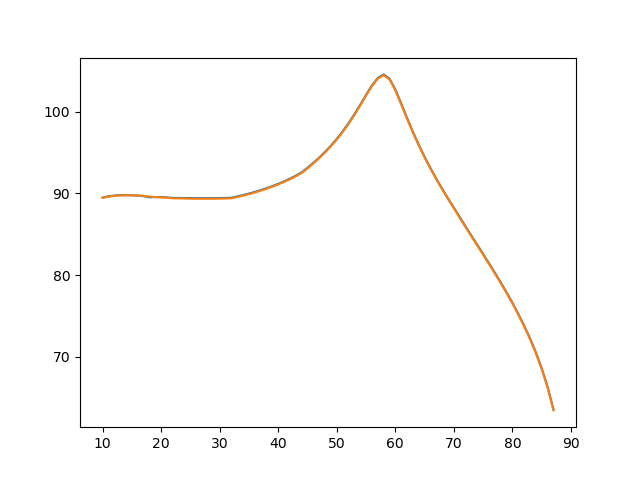

In [27]:
print(pwr.shape)
#print(vis.shape)
plt.figure()
freq_int=[f.value for f in freqs]
plt.plot(freq_int,10*np.log10(pwr[:,0,0]));
plt.plot(freq_int,10*np.log10(pwr[:,1,0]));
print(freq_int)
np.savez("SkyPwrFreq"+datestr,freq=freq_int,pwr=pwr[:,:,0])
plt.show()

In [58]:
from skycal import LBArad,get_coord,interpolate,CalcPower, compute_uv_coordinates, calculate_visibility
LBAs=LBArad('antenna/')
az_rad,z_rad=get_coord(plot=False)
az_deg=az_rad/np.pi*180
z_deg=z_rad/np.pi*180
#pwr=[]
vis=[]
uv = compute_uv_coordinates(ant_pos)

for freq in tqdm(freqs):
    beam_pattern,z1,az1=LBAs.getbeam(int(freq.value),lbanr)
    bp0=interpolate(beam_pattern[0,0],z1,az1,z_deg,az_deg)
    bp1=interpolate(beam_pattern[0,1],z1,az1,z_deg,az_deg)
    beam_sky=[bp0,bp1]
#    pwr.append(CalcPower(freq,latlonel,date_list,beam_sky))
    vis.append(calculate_visibility(date_list,latlonel,freq,uv,beam_sky))
#pwr=np.array(pwr)
vis=np.array(vis)

100%|███████████████████████████████████████████████████████████████████████████████████| 78/78 [03:29<00:00,  2.68s/it]


(78, 1, 3, 3, 2)


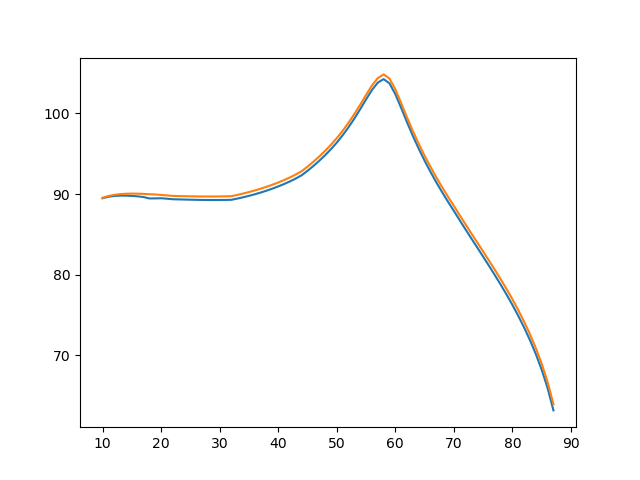

In [59]:
#print(pwr.shape)
print(vis.shape)
plt.figure()
freq_int=[f.value for f in freqs]

n=0
plt.plot(freq_int,10*np.log10(vis[:,0,n,n,0].real));
plt.plot(freq_int,10*np.log10(vis[:,0,n,n,1].real));
np.savez("SkyFreq_vis"+datestr,freq=freq_int,vis=vis[:,0,:,:,:],antpos=ant_pos)

plt.show()

(78, 1, 3, 3, 2)


(30.0, 80.0)

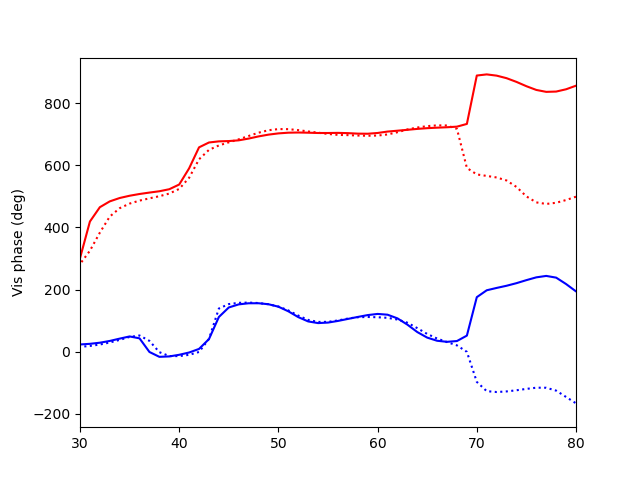

In [60]:
print(vis.shape)
#minutes=np.arange(0,time_interval,time_step)
plt.figure()
#plt.plot(np.abs(vis[:,1,0,0]));
plt.plot(freq_int,(np.unwrap(np.angle(vis[:,0,1,0,0])))/np.pi*180,'r-');
plt.plot(freq_int,(np.unwrap(np.angle(vis[:,0,1,0,1])))/np.pi*180,'r:');
plt.plot(freq_int,(np.unwrap(np.angle(vis[:,0,2,0,0])))/np.pi*180,'b-');
plt.plot(freq_int,(np.unwrap(np.angle(vis[:,0,2,0,1])))/np.pi*180,'b:');
#plt.xlabel("Time (hours)")
plt.ylabel("Vis phase (deg)")
#plt.show()
plt.xlim(30,80)

In [15]:
XST1=np.load("XST_sample_delay.npy")

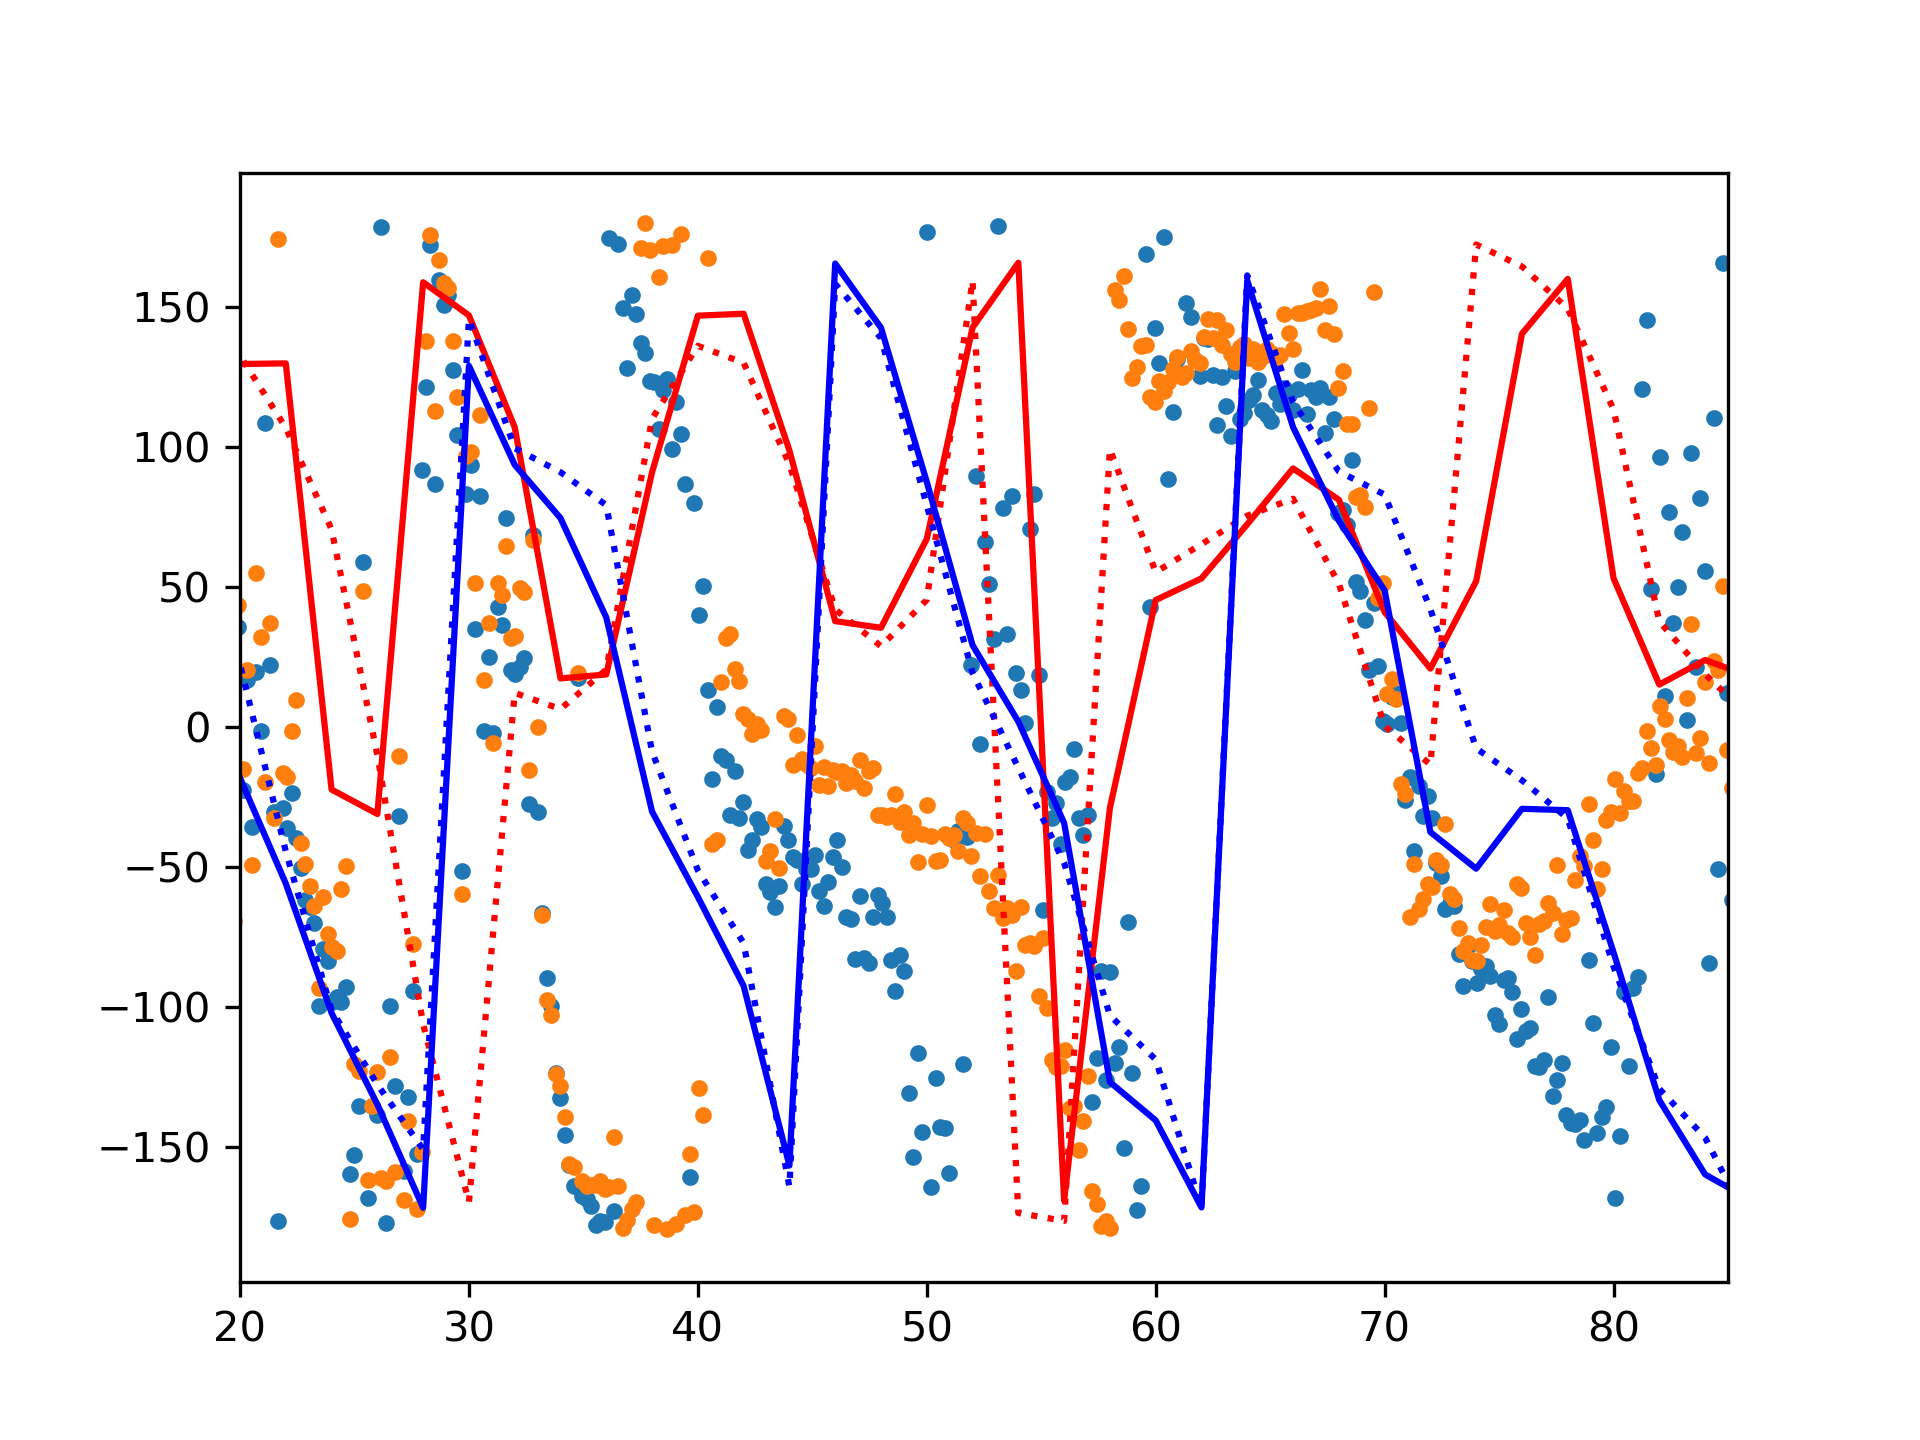

In [18]:
p1=3
p2=6
freqXST=np.arange(512)/512*100
plt.figure(dpi=300)
plt.plot(freqXST,(np.angle(-XST1[:,p2*2,p1*2]*np.exp(2j*np.pi*0.0)))/np.pi*180,'.',label='Sample delay',linewidth=0.3)
plt.plot(freqXST,(np.angle(-XST1[:,p2*2+1,p1*2+1]*np.exp(2j*np.pi*0.0)))/np.pi*180,'.',label='Sample delay',linewidth=0.3)
plt.plot(freq_int,((np.angle(-vis[:,0,1,0,0])))/np.pi*180,'r-');
plt.plot(freq_int,((np.angle(-vis[:,0,1,0,1])))/np.pi*180,'r:');
plt.plot(freq_int,((np.angle(vis[:,0,2,0,0])))/np.pi*180,'b-');
plt.plot(freq_int,((np.angle(vis[:,0,2,0,1])))/np.pi*180,'b:');
plt.xlim(20,85)
plt.show()